In [2]:
# %load kNN_GS.py

from pandas.core.dtypes.missing import na_value_for_dtype
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

# Load files get datas

file = './9to1TrainData.csv'
testFile = './9to1TestData.csv'

df1 = pd.read_csv(testFile, header = 0 ,usecols=[0,2,3,4,5,6,7,8,9], index_col=[0])
df2 = pd.read_csv(testFile, header = 0 ,usecols=[0,10], index_col=[0])

na1 = df1.to_numpy()
na2 = df2.to_numpy()

data = na1
label = na2 

# Spitting datas

train_data , test_data , train_label , test_label = train_test_split(data,label,test_size = 0.2)

# Parameter tuning with GridSearchCV 

estimator_KNN = KNeighborsClassifier(algorithm='auto')
parameters_KNN = {'n_neighbors': (9,10,11),
                  'leaf_size': (20,40),
                  'p': (1,2),
                  'weights': ('uniform', 'distance'),
                  'metric': ('minkowski', 'chebyshev'),
}
                   
# With GridSearch

grid_search_KNN = GridSearchCV(
    estimator=estimator_KNN,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 3
)

KNN_1=grid_search_KNN.fit(train_data, train_label)
y_pred_KNN1 =KNN_1.predict(test_data)

# Mean cross-validated score of the best_estimator

print('Best Score - KNN:', grid_search_KNN.best_score_ )

# Parameter setting that gave the best results on the hold out data.

print('Best Parameter - KNN:', grid_search_KNN.best_params_)

# best parameter i got is {'leaf_size': 20, 'metric': 'chebyshev', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}



Best Score - KNN: 0.6953239555790587
Best Parameter - KNN: {'leaf_size': 20, 'metric': 'chebyshev', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}


C:\Users\katyh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [51]:
# %load kNN_sklearn.py

from pandas.core.dtypes.missing import na_value_for_dtype
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd


# Load files get datas

file = './9to1TrainData.csv'
testFile = './9to1TestData.csv'

df1 = pd.read_csv(testFile, header = 0 ,usecols=[0,2,3,4,5,6,7,8,9], index_col=[0])
df2 = pd.read_csv(testFile, header = 0 ,usecols=[0,10], index_col=[0])

na1 = df1.to_numpy()
na2 = df2.to_numpy()

data = na1
label = na2 

# Spitting datas

train_data , test_data , train_label , test_label = train_test_split(data,label,test_size = 0.2)

# Use KNeighborsClassifier and train the model (Parameter from GS)

knn = KNeighborsClassifier(n_neighbors = 9, leaf_size = 20, p = 1, weights = 'uniform', metric = 'chebyshev' , algorithm='brute') # 試驗後發現 algorithm='brute' 的效果最好
knn.fit(train_data,train_label)


df3 = knn.predict(test_data)
df4 = test_label

y_pred = df3
y_true = df4

# Get accuracy score and precision score

a = accuracy_score(y_true, y_pred)
print(a)
p = precision_score(y_true, y_pred, average=None)
print(p)

testDF = pd.read_csv(testFile, header = 0 ,usecols=[0,2,3,4,5,6,7,8,9], index_col=[0])
testNP = testDF.to_numpy()
test_pred = knn.predict(testNP)
index = pd.Series(data = testDF.index)
test_pred = pd.Series(data=test_pred)
output = pd.concat({'代號': index, 'label': test_pred},
                        axis=1)


# Outout the data
output.to_csv('./9to1_kNN.csv',index = False)





0.7446808510638298
[0.76190476 0.73076923]


C:\Users\katyh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


C:\Users\katyh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


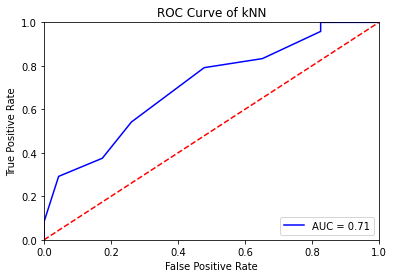

In [46]:
# %load ROC_Curve.py

from pandas.core.dtypes.missing import na_value_for_dtype
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


file = './9to1TrainData.csv'
testFile = './9to1TestData.csv'

df1 = pd.read_csv(testFile, header = 0 ,usecols=[0,2,3,4,5,6,7,8,9], index_col=[0])
df2 = pd.read_csv(testFile, header = 0 ,usecols=[0,10], index_col=[0])

na1 = df1.to_numpy()
na2 = df2.to_numpy()

data = na1
label = na2 


X_train, X_test, y_train, y_test = train_test_split(data,label,test_size = 0.2)

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train,y_train)

y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()


